<a href="https://colab.research.google.com/github/shubhamraut0209/Data-Analyst-Internship-Projects/blob/main/Netflix_Movie_Recommendations_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title:** Netflix Movie Recommendations

**Objective:** Build a content-based recommendation system using TF-IDF and Cosine Similarity to suggest Netflix movies based on user preferences (e.g., genres, descriptions).

# **Step 1: Data Collection**

**1. Load the dataset**

In [1]:
import pandas as pd
df = pd.read_csv('/content/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**2. Check basic info**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [3]:
df.shape

(8807, 12)

In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# **Step 2: Data Cleaning and Preprocessing**

In [5]:
# Drop null or unnecessary columns:

df.dropna(subset=['title', 'type', 'description', 'listed_in'], inplace=True)

In [6]:
# Remove duplicates:

df.drop_duplicates(subset='title', inplace=True)

In [7]:
# Text processing (combine relevant text fields):

df['content'] = df['title'] + ' ' + df['listed_in'] + ' ' + df['description']

# **Step 3: Exploratory Data Analysis (EDA)**

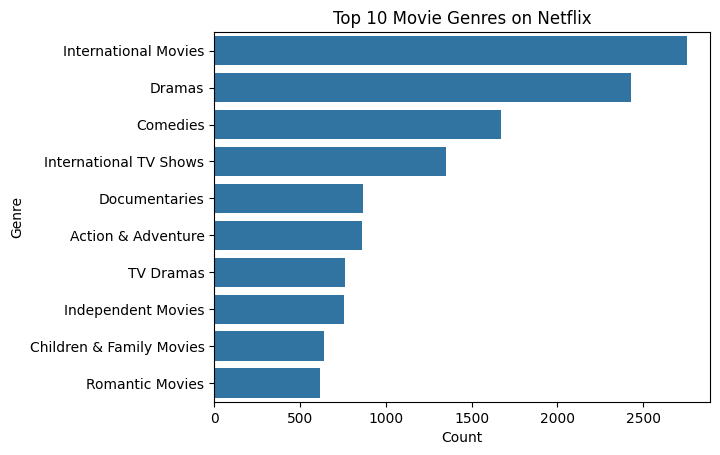

In [8]:
# Popular genres:

import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
genres = ','.join(df['listed_in']).split(',')
genre_counts = Counter([g.strip() for g in genres])
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

sns.barplot(data=top_genres, x='Count', y='Genre')
plt.title("Top 10 Movie Genres on Netflix")
plt.show()

In [9]:
# Ratings vs. release year

df['release_year'].value_counts().sort_index()

,count
release_year,
1925,1
1942,2
1943,3
1944,3
1945,4
...,...
2017,1032
2018,1147
2019,1030


# **Step 4: Feature Engineering - TF-IDF Vectorization**

In [10]:
# Import & Apply TF-IDF:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['content'])

# **Step 5: Cosine Similarity for Recommendations**

In [11]:
# Compute similarity matrix:

from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [12]:
# Create a mapping of movie titles:

indices = pd.Series(df.index, index=df['title'].str.lower()).drop_duplicates()

In [13]:
# Define recommendation function:

def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title.lower()]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]

In [14]:
# Test the recommender:

get_recommendations('Narcos')

,title
2921,Narcos: Mexico
7463,Miss Dynamite
6673,El Cartel 2
2,Ganglands
4750,El Chapo
3524,Top Boy
1268,El final del paraíso
1223,Dealer
5822,Cocaine
3787,Bad Blood


In [15]:
# Test the recommender:

get_recommendations('Kota Factory')

,title
3461,Cheese in the Trap
5412,Criminal Minds
4265,Single Ladies Senior
8334,The Great Train Robbery
2362,The Politician
805,Racket Boys
2447,Dear My Friends
8165,Teresa
749,L.A.’s Finest
7632,"O-Negative, Love Can’t Be Designed"


# **Step 6: Conclusion**



*   You’ve built a content-based Netflix recommender system that suggests movies based on genres, titles, and descriptions using TF-IDF and Cosine Similarity.
*   It can be enhanced further using collaborative filtering, user-based profiling, or neural embeddings for improved accuracy.

